In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

from matplotlib import rc

import mplcyberpunk
plt.style.use('cyberpunk')
warnings.filterwarnings("ignore")

rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', size=12)
%matplotlib inline

In [18]:
data_path = '/Users/tastebread/Desktop/kaggle/competitive-data-science-predict-future-sales/'
train = pd.read_csv(data_path + 'sales_train.csv')
test = pd.read_csv(data_path + 'test.csv')
sample_submission = pd.read_csv(data_path + 'sample_submission.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
items = pd.read_csv(data_path + 'items.csv')
shops = pd.read_csv(data_path + 'shops.csv')

In [19]:
display(train.head())
display(test.head())
display(sample_submission.head())
display(item_categories.head())
display(items.head())
display(shops.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [20]:
df = train.merge(shops, on='shop_id',how='left')
df = df.merge(items, on='item_id',how='left')
df = df.merge(item_categories, on='item_category_id', how='left')

df.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [21]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values

    return summary

In [22]:
resumetable(df)

데이터셋 형상: (2935849, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


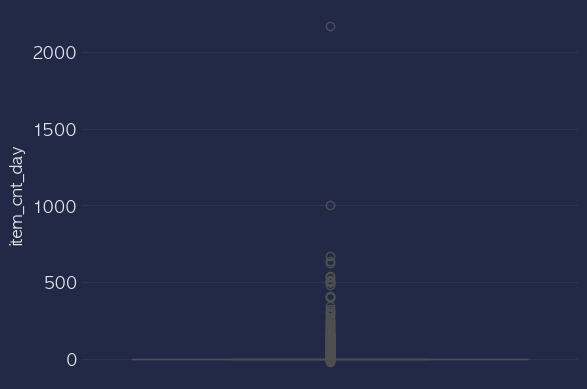

'\n박스플롯의 모양이 이상한이유는 이상치의 범위가 과도하게 넓어서 박스가 납작하게 접힌 상태.\n\n여기서는 일별 판매량이 1000이상인 데이터 제거\n판매가 50,000 이상 데이터 제거\n'

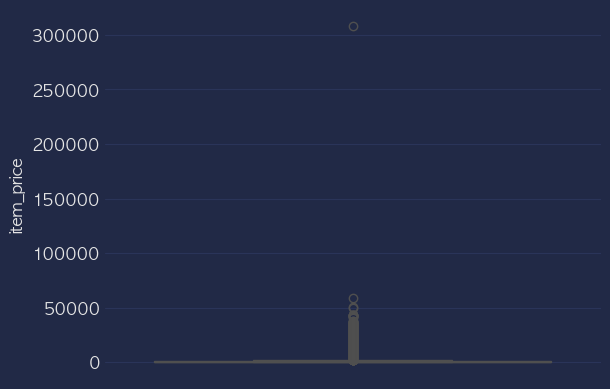

In [23]:
#일별 판매량 시각화

sns.boxplot(y='item_cnt_day',data=train)
plt.show()
sns.boxplot(y='item_price',data=train)

"""
박스플롯의 모양이 이상한이유는 이상치의 범위가 과도하게 넓어서 박스가 납작하게 접힌 상태.

여기서는 일별 판매량이 1000이상인 데이터 제거
판매가 50,000 이상 데이터 제거
"""

In [24]:
group = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group.reset_index()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


[Text(0.5, 1.0, '월별 총 상품 판매량'),
 Text(0.5, 0, '2013년 1월~2015년 10월 월별 판매량'),
 Text(0, 0.5, '판매량')]

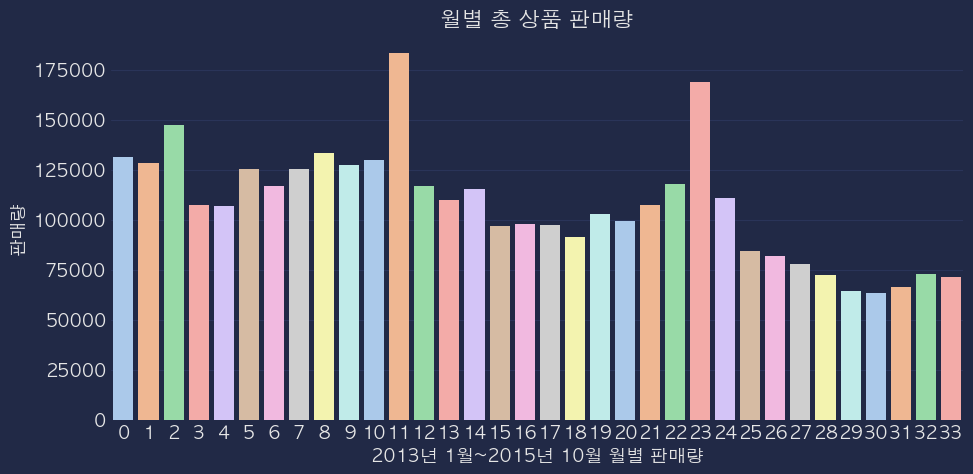

In [25]:
#월별 총 상품 판매량 시각화

mpl.rc('font',size=13)
fig,ax = plt.subplots()
fig.set_size_inches(11,5)

#월별 총 상품 판매량
group_month = df.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group_month.reset_index()

#월별 총 상품 판매량 막대 그래프
sns.barplot(x='date_block_num',y='item_cnt_day',palette='pastel', data=group_month)

ax.set(title='월별 총 상품 판매량',
       xlabel='2013년 1월~2015년 10월 월별 판매량',
       ylabel='판매량')

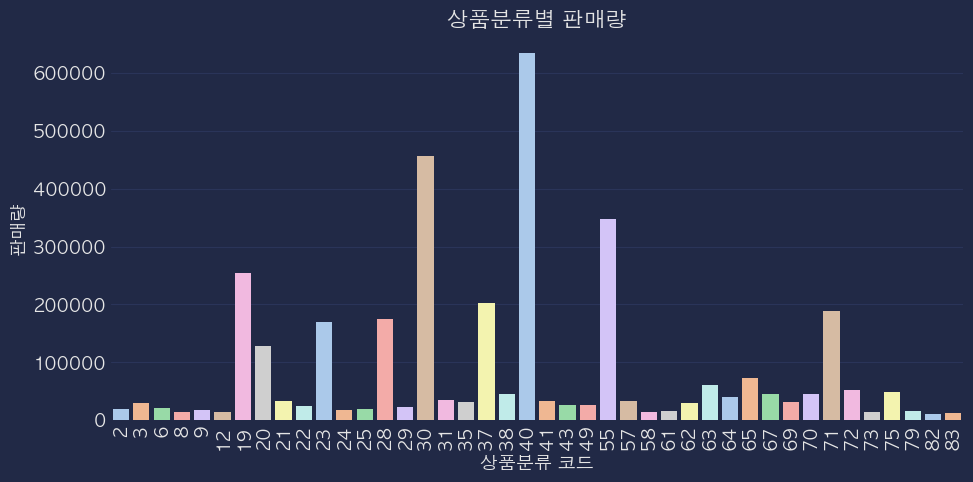

In [29]:
#상품분류별 판매량

#현재 상품분류는 84개이다. 모두다 막대그래프로 표현할수 없으므로 판매량이 10,000개를 초과하는 상품분류만 추출해서 시각화하기

#월별 총 상품 판매량 시각화

fig,ax = plt.subplots()
fig.set_size_inches(11,5)

#월별 총 상품 판매량
group_cat = df.groupby('item_category_id').agg({'item_cnt_day': 'sum'})
group_cat.reset_index()
group_cat = group_cat[group_cat['item_cnt_day'] > 10000]

#월별 총 상품 판매량 막대 그래프
sns.barplot(x='item_category_id',y='item_cnt_day',palette='pastel', data=group_cat)

ax.set(title='상품분류별 판매량',
       xlabel='상품분류 코드',
       ylabel='판매량')
ax.tick_params(axis='x', labelrotation=90)

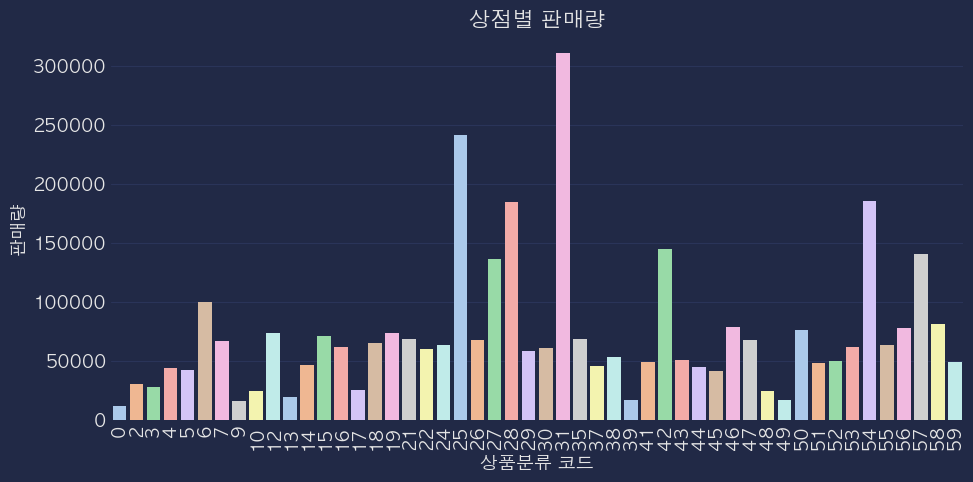

In [31]:
#상품분류별 판매량

#현재 상품분류는 84개이다. 모두다 막대그래프로 표현할수 없으므로 판매량이 10,000개를 초과하는 상품분류만 추출해서 시각화하기

#월별 총 상품 판매량 시각화

fig,ax = plt.subplots()
fig.set_size_inches(11,5)

#월별 총 상품 판매량
group_shop = df.groupby('shop_id').agg({'item_cnt_day': 'sum'})
group_shop.reset_index()
group_shop = group_shop[group_shop['item_cnt_day'] > 10000]

#월별 총 상품 판매량 막대 그래프
sns.barplot(x='shop_id',y='item_cnt_day',palette='pastel', data=group_shop)

ax.set(title='상점별 판매량',
       xlabel='상품분류 코드',
       ylabel='판매량')
ax.tick_params(axis='x', labelrotation=90)